# Introduction

E-learning is a method of teaching that makes use of technologies to allow for distant connection between students and teachers.

E-learning is the interaction between a teacher and students who are separated by a physical distance. It incorporates all the elements of the educational process (goals, content, organisational structures, and teaching aids) and is carried out using specific Internet technologies or other interactive methods.

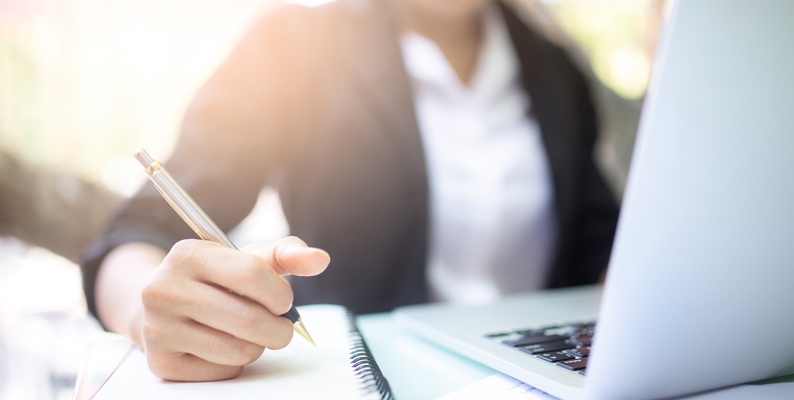

# Context


Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of Students’ Adaptability Level Prediction in Online Education using Machine Learning Approaches

# Work plan 

* Data Exploration & Analysis
* Building a Machine Learning Model /Classification Predict

# Importing the necessary libraries and data for EDA

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-flexibility-in-online-learning/students_adaptability_level_online_education.csv


# Loading the data

In [2]:
df = pd.read_csv('/kaggle/input/student-flexibility-in-online-learning/students_adaptability_level_online_education.csv')
df

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low
...,...,...,...,...,...,...,...,...,...,...,...
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,Low
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Moderate
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Low


# Need to look at the data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [4]:
df.Age = df.Age.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   object
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: object(11)
memory usage: 103.7+ KB


In [5]:
df.isnull().sum()

Education Level        0
Institution Type       0
Gender                 0
Age                    0
Device                 0
IT Student             0
Location               0
Financial Condition    0
Internet Type          0
Network Type           0
Flexibility Level      0
dtype: int64

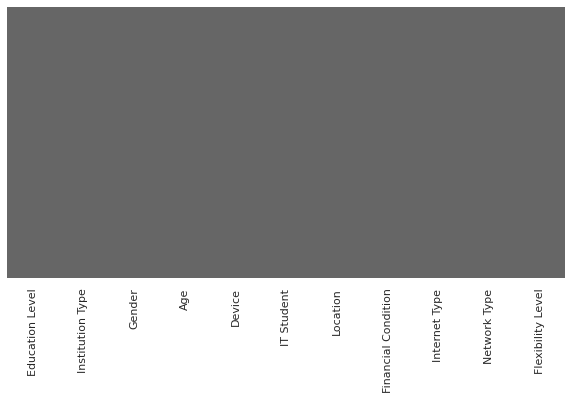

In [6]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')
plt.show()

In [7]:
df.describe().T

,count,unique,top,freq
Education Level,1205,3,School,530
Institution Type,1205,2,Private,823
Gender,1205,2,Male,663
Age,1205,6,23,374
Device,1205,3,Mobile,1013
IT Student,1205,2,No,901
Location,1205,2,Town,935
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


# analysis of the data by constructing a general distribution of features by their number.

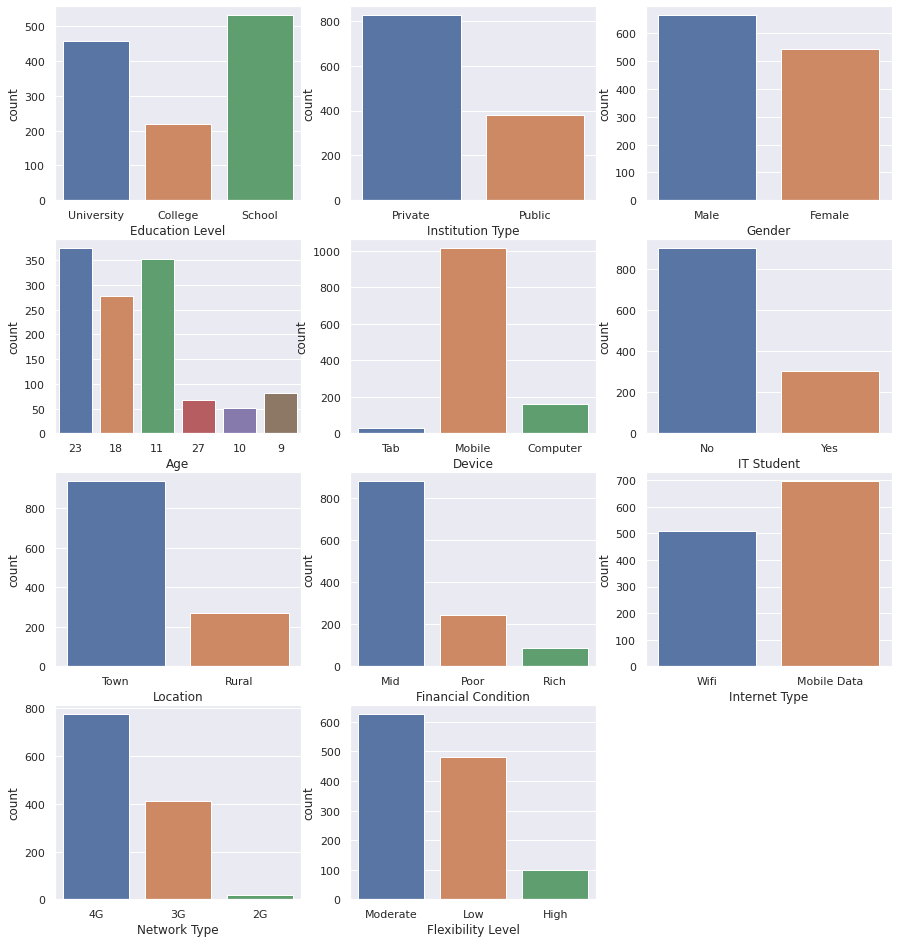

In [8]:
i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

# distribution of the number of students depending on the level of their Flexibility.

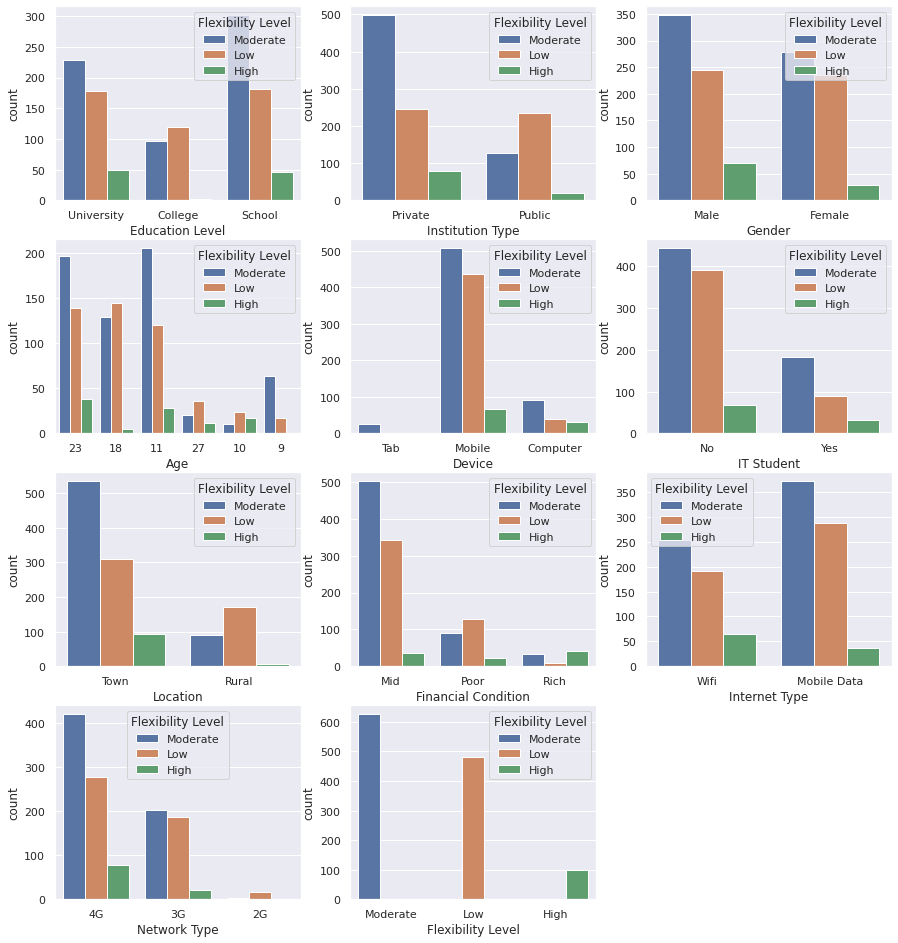

In [9]:
i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Flexibility Level', data = df)
    i +=1

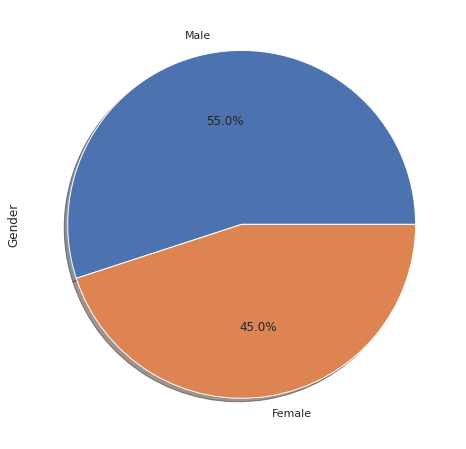

In [10]:
plt.figure(figsize=(12,8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


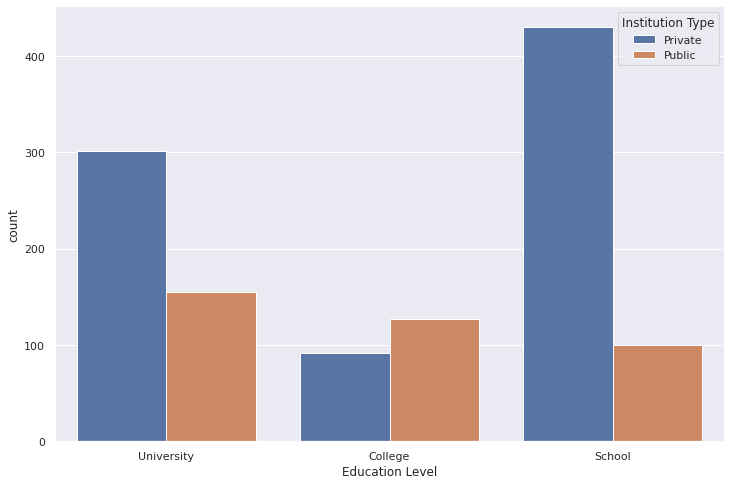

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(df["Education Level"],hue=df["Institution Type"])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


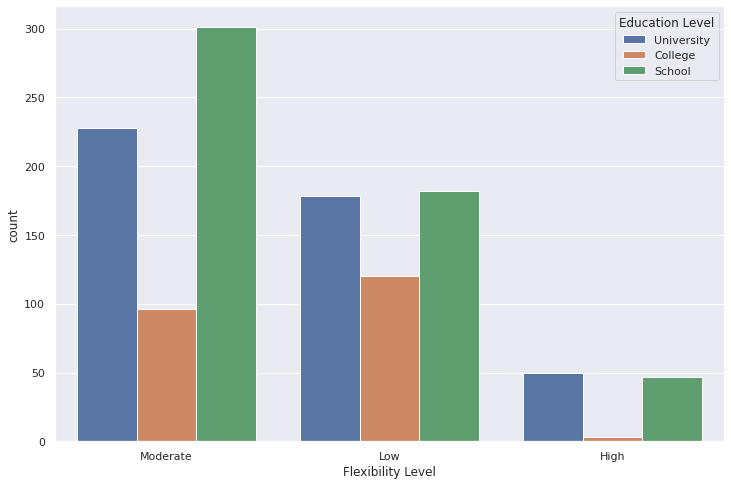

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(df["Flexibility Level"],hue=df["Education Level"])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


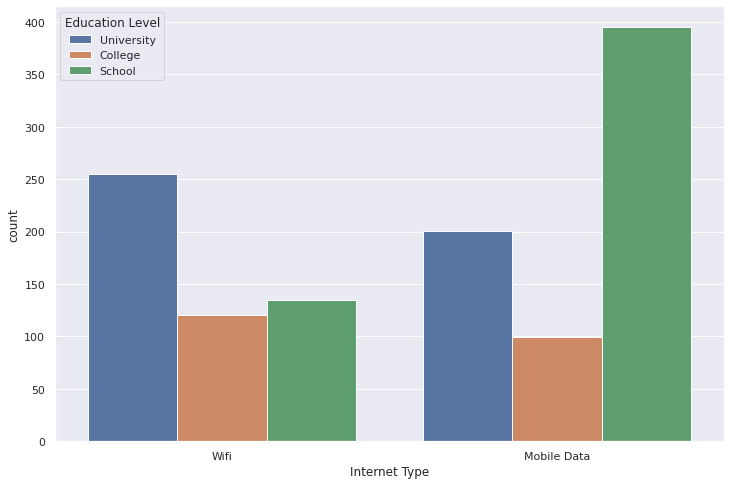

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(df["Internet Type"],hue=df["Education Level"])
plt.show()

# Machine learning.

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
scaler = OrdinalEncoder()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0
1,2.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
2,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
4,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


# Split data and build pipelines

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE 

In [17]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(scaled_df.drop(["Flexibility Level"],axis=1),scaled_df["Flexibility Level"])

In [18]:
X_train, X_test, y_train, y_test=train_test_split(features, labels,test_size=0.33,random_state=42)

In [19]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       214
         1.0       0.86      0.83      0.85       207
         2.0       0.81      0.79      0.80       198

    accuracy                           0.86       619
   macro avg       0.86      0.86      0.86       619
weighted avg       0.86      0.86      0.86       619

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       214
         1.0       0.77      0.77      0.77       207
         2.0       0.72      0.67      0.70       198

    accuracy                           0.80       619
   macro avg       0.79      0.79      0.79       619
weighted avg       0.79      0.80      0.80       619

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.7

In [20]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       214
         1.0       0.84      0.79      0.82       207
         2.0       0.78      0.77      0.77       198

    accuracy                           0.85       619
   macro avg       0.84      0.84      0.84       619
weighted avg       0.84      0.85      0.85       619



In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

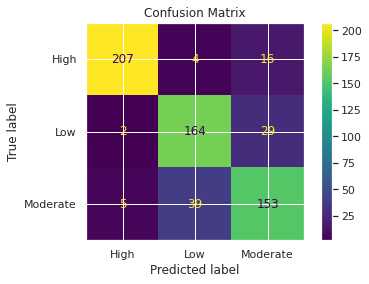

In [22]:
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Thanks for Reading! leave comments on the work that you would like to explore and add to my work!

# Please upvote if you think this notebook is helpful !!!